<a href="https://colab.research.google.com/github/lunaB/Pytorch-Study/blob/master/12_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim

In [4]:
# XRP 과거데이터
!wget https://www.coingecko.com/price_charts/export/44/mmk.csv

--2020-05-17 13:35:57--  https://www.coingecko.com/price_charts/export/44/mmk.csv
Resolving www.coingecko.com (www.coingecko.com)... 104.22.78.192, 104.22.79.192, 2606:4700:10::6816:4ec0, ...
Connecting to www.coingecko.com (www.coingecko.com)|104.22.78.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘mmk.csv.1’

mmk.csv.1               [ <=>                ] 181.89K  1.18MB/s    in 0.2s    

2020-05-17 13:35:59 (1.18 MB/s) - ‘mmk.csv.1’ saved [186259]



In [5]:
# 데이터 로드
data = pd.read_csv('mmk.csv')
data.head()
# 초기에는 거래량이 없음을 알 수 있슴.

,snapped_at,price,market_cap,total_volume
0,2013-08-04 00:00:00 UTC,NaN,NaN,NaN
1,2013-08-05 00:00:00 UTC,NaN,NaN,NaN
2,2013-08-06 00:00:00 UTC,NaN,NaN,NaN
3,2013-08-07 00:00:00 UTC,NaN,NaN,NaN
4,2013-08-08 00:00:00 UTC,NaN,NaN,NaN


In [6]:
data.tail()
# 최근거래량은 많음

,snapped_at,price,market_cap,total_volume
2472,2020-05-14 00:00:00 UTC,285.034544,1.257679e+13,2.670441e+12
2473,2020-05-15 00:00:00 UTC,285.034544,1.257679e+13,2.670441e+12
2474,2020-05-15 00:00:00 UTC,287.181773,1.266841e+13,2.797837e+12
2475,2020-05-16 00:00:00 UTC,278.781698,1.229786e+13,2.614371e+12
2476,2020-05-17 00:00:00 UTC,281.883409,1.243468e+13,2.273600e+12


In [7]:
# 데이터정보
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   snapped_at    2477 non-null   object 
 1   price         2451 non-null   float64
 2   market_cap    2383 non-null   float64
 3   total_volume  2431 non-null   float64
dtypes: float64(3), object(1)
memory usage: 77.5+ KB


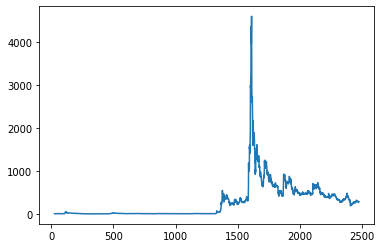

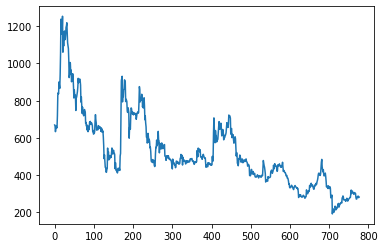

데이터수  777
(747, 1, 30)
[0.84306015 0.81420563 0.82217717 0.84620272 0.84909196 0.85541162
 0.86448376 0.87563954 0.87605765 0.94808106 1.         0.94014085
 0.96016534 0.98349625 0.96153518 0.95562873 0.94294876 0.92790117
 0.95713169 0.95477691 0.944203   0.944203   0.87887673 0.84846777
 0.84846777 0.87182451 0.89144013 0.89144013 0.89815555 0.87188447
 0.88158501]
[[0.84306015 0.81420563 0.82217717 0.84620272 0.84909196 0.85541162
  0.86448376 0.87563954 0.87605765 0.94808106 1.         0.94014085
  0.96016534 0.98349625 0.96153518 0.95562873 0.94294876 0.92790117
  0.95713169 0.95477691 0.944203   0.944203   0.87887673 0.84846777
  0.84846777 0.87182451 0.89144013 0.89144013 0.89815555 0.87188447]]
[[0.88158501]]


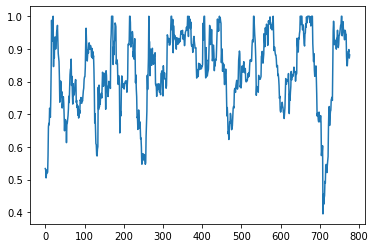

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프 확인
plt.plot(np.array(data['price']))
plt.show()

# 극단적 데이터 제거 (거래량 없을때)
new_data = np.array(data['price'])[1700:]
plt.plot(new_data)
plt.show()

# 데이터
input_size = 30
output_size = 1
print('데이터수 ',len(new_data))

# 학습을 위해 데이터 나누기
train_data = []
target_data = []
# m = np.max(new_data)
for i in range(len(new_data) - input_size):
    # 스케일링
    max_v = max(new_data[i:i+input_size+output_size])
    train_data.append(np.array([new_data[i:i+input_size]]) / max_v)
    target_data.append(np.array([new_data[i+input_size:i+input_size+output_size]]) / max_v)

print(np.array(train_data).shape)

# 일치 확인 (max_v 남아있는값)
print(new_data[-input_size -output_size:] / max_v)
print(train_data[-1])
print(target_data[-1])

train_data = np.array(train_data, dtype=np.float32)
target_data = np.array(target_data, dtype=np.float32)

# input size output size 31개 기준으로 가장높은 나누어 0~1의 값을 만듬
plt.plot(np.concatenate((train_data[0].reshape(-1), target_data.reshape(-1))))
plt.show()

1 ephoch loss : 3.157991647720337
101 ephoch loss : 0.033125970512628555
201 ephoch loss : 0.015589214861392975
301 ephoch loss : 0.01280475128442049
401 ephoch loss : 0.011943456716835499
501 ephoch loss : 0.011624946258962154
601 ephoch loss : 0.01147113274782896
701 ephoch loss : 0.011363739147782326
801 ephoch loss : 0.011265099979937077
901 ephoch loss : 0.011163917370140553
1001 ephoch loss : 0.011057309806346893


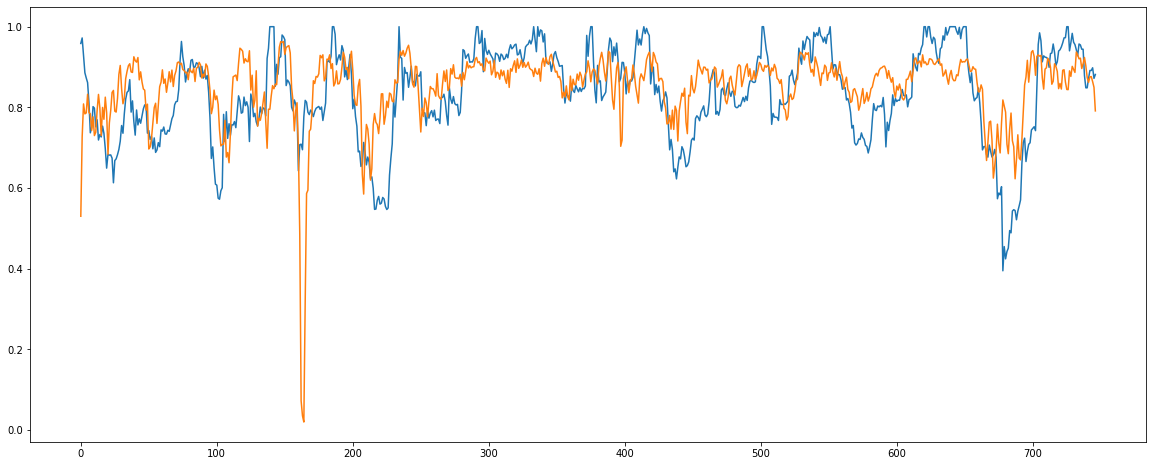

In [9]:
rnn = torch.nn.RNN(input_size=input_size, hidden_size=1)

loss_func = nn.MSELoss()
optm = torch.optim.Adam(rnn.parameters(), lr=0.0005)

for i in range(1000+1):

    input_tensor = torch.FloatTensor(train_data)
    target_tensor = torch.FloatTensor(target_data)

    # print(input_tensor.size())
    # print(target_tensor.size())

    output, hidden = rnn(input_tensor)

    # print(output.size())
    loss = loss_func(output, target_tensor)

    optm.zero_grad()
    loss.backward()
    optm.step()

    if i%100 == 0:
        print(i+1, 'ephoch loss :', loss.item())

plt.rcParams["figure.figsize"] = (20,8)
plt.plot(target_data.reshape(-1))
plt.plot(output.view(-1).tolist())
plt.show()